In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/Mall_Customers.csv')

df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Choose the number of clusters (you may need to fine-tune this)
num_clusters = 5
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']] # Modify this based on your dataset columns

df['Cluster'] = kmeans.fit_predict(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


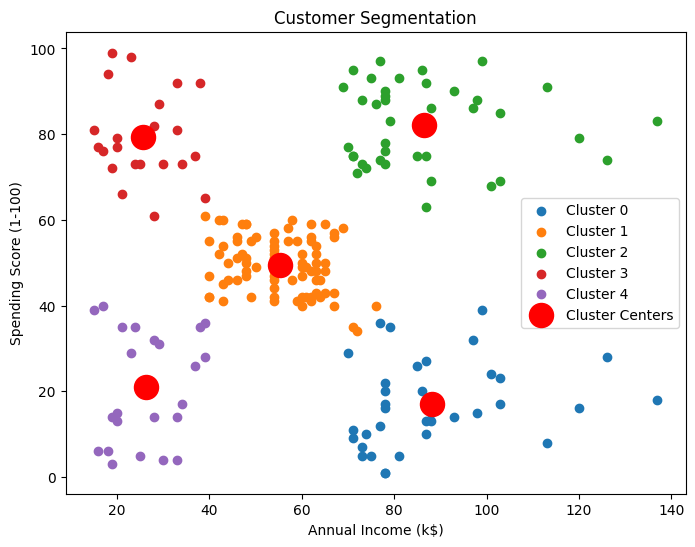

In [11]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()


In [12]:
# Interpret the clusters
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print(cluster_data.describe())


Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   35.000000  35.000000           35.000000               35.000000   
mean   164.371429  41.114286           88.200000               17.114286   
std     21.457325  11.341676           16.399067                9.952154   
min    125.000000  19.000000           70.000000                1.000000   
25%    148.000000  34.000000           77.500000               10.000000   
50%    165.000000  42.000000           85.000000               16.000000   
75%    182.000000  47.500000           97.500000               23.500000   
max    199.000000  59.000000          137.000000               39.000000   

       Cluster  
count     35.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               8